# Linear regression scratchpad

File: noob/minitab_particle_board.ipynb

In [1]:
# Temporary notebook to develop linear regression example
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.cm as cm
import matplotlib.axes as axes
from scipy import stats

In [2]:
# Colour-blind colour definitions.
c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12 = cm.Paired.colors
# See "paired" in "qualitative colormaps"
# https://matplotlib.org/tutorials/colors/colormaps.html

In [3]:
# Function to remove upper and right graphic borders.
def despine(ax: axes.Axes) -> None:
    'Remove the top and right spines of a graph'
    for spine in 'right', 'top':
        ax.spines[spine].set_color('none')

In [4]:
df = pd.read_csv('particle_board.csv')

In [5]:
df.head()

,Density,Stiffness,Temp
0,9.5,14.814,70.610561
1,8.4,17.502,73.348930
2,9.8,14.007,66.153767
3,11.0,19.443,70.057809
4,8.3,7.573,69.339188


In [6]:
df.dtypes

Density      float64
Stiffness    float64
Temp         float64
dtype: object

In [7]:
y = df['Stiffness']
x = df['Density']
x = sm.add_constant(x) # This adds a new column 'const' filled with 1.0.

/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
model = sm.OLS(y, x)

In [9]:
fitted = model.fit()

In [10]:
y_predicted = fitted.predict(x)

In [11]:
df['Stiffness predicted'] = y_predicted

In [12]:
df.head()

,Density,Stiffness,Temp,Stiffness predicted
0,9.5,14.814,70.610561,12.101302
1,8.4,17.502,73.348930,8.206708
2,9.8,14.007,66.153767,13.163464
3,11.0,19.443,70.057809,17.412112
4,8.3,7.573,69.339188,7.852654


In [13]:
df

,Density,Stiffness,Temp,Stiffness predicted
0,9.5,14.814,70.610561,12.101302
1,8.4,17.502,73.348930,8.206708
2,9.8,14.007,66.153767,13.163464
3,11.0,19.443,70.057809,17.412112
4,8.3,7.573,69.339188,7.852654
5,9.9,14.191,69.128820,13.517518
6,8.6,9.714,69.833514,8.914816
7,6.4,8.076,64.366166,1.125628
8,7.0,5.304,65.410393,3.249952
9,8.2,10.728,67.767388,7.498600


In [14]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Stiffness   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     146.9
Date:                Mon, 04 Mar 2019   Prob (F-statistic):           1.98e-12
Time:                        08:51:53   Log-Likelihood:                -103.41
No. Observations:                  29   AIC:                             210.8
Df Residuals:                      27   BIC:                             213.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.5338      4.735     -4.547      0.000     -31.250     -11.817
Density        3.5405      0.292     12.119      0.000       2.941       4.140
==============================================================================
Omnibus:                        8.160   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                6.591
Skew:                           0.891   Prob(JB):                       0.0370
Kurtosis:                       4.509   Cond. No.                         46.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Residual error
np.sqrt(fitted.mse_resid)

8.869372243650794

In [16]:
# R squared adjusted, as a fraction
fitted.rsquared_adj

0.8389498722293132

In [17]:
# p values for models terms
fitted.pvalues

const      1.027683e-04
Density    1.981180e-12
dtype: float64

In [18]:
# Confidence intervals for the regression coefficients
fitted.conf_int()

,0,1
const,-31.250180,-11.817480
Density,2.941079,4.140001


In [19]:
# Regression coefficients
fitted.params

const     -21.53383
Density     3.54054
dtype: float64

In [23]:
fitted.normalized_cov_params

,const,Density
const,0.285061,-0.016489
Density,-0.016489,0.001085


In [32]:
df[['Stiffness predicted plus CI']] = df[['Stiffness predicted']] + 4
df[['Stiffness predicted plus CI']]

,Stiffness predicted plus CI
0,16.101302
1,12.206708
2,17.163464
3,21.412112
4,11.852654
5,17.517518
6,12.914816
7,5.125628
8,7.249952
9,11.498600


In [42]:
A = df[['Density']]
B = df[['Stiffness']]
C = np.transpose(B)

In [43]:
C

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Stiffness,14.814,17.502,14.007,19.443,7.573,14.191,9.714,8.076,5.304,10.728,...,18.036,96.305,72.594,49.512,32.207,48.218,70.453,47.661,38.138,53.045


In [46]:
D = np.matmul(C, A)

ValueError: Shape of passed values is (1, 1), indices imply (1, 29)

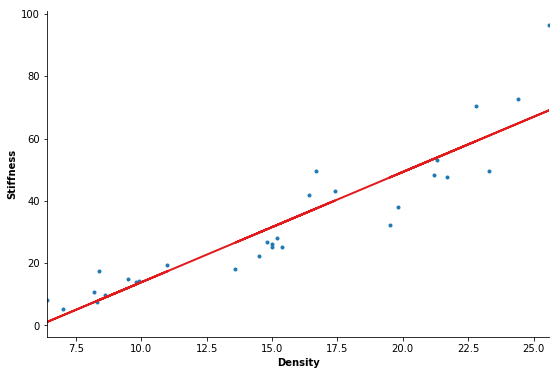

In [20]:
# Scatter plot of actuals and predicted.
ax = df.plot.line(x='Density',
                  y='Stiffness',
                  legend=False,
                  style='.',
                  color=c2,
                  figsize=(9, 6))
ax.set_ylabel('Stiffness', fontweight='bold')
ax.set_xlabel('Density', fontweight='bold')
df.plot(x='Density',
        y='Stiffness predicted',
        linewidth=2,
        color=c6,
        legend=False,
        ax=ax)
despine(ax)